In [205]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import os

df = pd.read_csv("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/save_files/df_raw.csv")
df.head()

<ipython-input-205-d12ed3d607ff>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0,Patient_ID,DICOM_paths,TIFF_T2M_paths,TIFF_T2M+_paths,Mask_T2M_paths,Mask_T2M+_paths
0,0,Pat11,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat11_DICOM/Pat11_T2/LM2MV2VH/OHEQGMTJ,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat11/Pat11T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat11/Pat11T2M+,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat11/Pat11_Mask_T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat11/Pat11_Mask_T2M+
1,1,Pat12,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat12_DICOM/Pat12_T2/OBCRCIOY/JKT5FMT3,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat12/Pat12T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat12/Pat12T2M+,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat12/Pat12_Mask_T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat12/Pat12_Mask_T2M+
2,2,Pat13,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat13_DICOM/Pat13_T2/4DPBAUOE/XTJT4XXK,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat13/Pat13T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat13/Pat13T2M+,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat13/Pat13_Mask_T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat13/Pat13_Mask_T2M+
3,3,Pat14,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat14_DICOM/Pat14_T2/HCIP4M1X/EGEKLQIM,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat14/Pat14T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat14/Pat14T2M+,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat14/Pat14_Mask_T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat14/Pat14_Mask_T2M+
4,4,Pat16,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_DICOM/Pat16_DICOM/Pat16_T2/SIVYORLP/IL5NFXDJ,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat16/Pat16T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat16/Pat16T2M+,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat16/Pat16_Mask_T2M,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat16/Pat16_Mask_T2M+


In [20]:
df.shape

(76, 7)

In [21]:
for i in df['DICOM_paths']:
    if not os.path.exists(i):
        print(i)
        
for i in df['TIFF_T2M_paths']:
    if not os.path.exists(i):
        print(i)
        
for i in df['TIFF_T2M+_paths']:
    if not os.path.exists(i):
        print(i)
        
for i in df['Mask_T2M_paths']:
    if not os.path.exists(i):
        print(i)
        
for i in df['Mask_T2M+_paths']:
    if not os.path.exists(i):
        print(i)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_TIFF/Pat3/Pat3_Mask_T2M/Pat3T2M25.png"
img = np.asarray(Image.open(path))
img.shape

(512, 512)

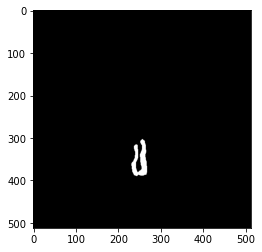

In [23]:
plt.imshow(img, cmap="gray")

In [46]:
temp_IDs = []
for index, i in df.iterrows():
    if len(os.listdir(i['Mask_T2M_paths'])) == 0 or len(os.listdir(i['Mask_T2M+_paths'])) == 0:
        temp_IDs.append(i['Patient_ID'])
        
temp_IDs

[]

In [44]:
print(df.shape)
df = df[~df['Patient_ID'].isin(temp_IDs)].reset_index(drop=True)
print(df.shape)

(76, 7)
(72, 7)


# Check if the image i.e. loaded from .nrrd format is aligned with the Mask or not

for the following patient IDs, the dicom.nrrd is in a reverse sequence to that of Mask:-
(T2M.nrrd and T2M+.nrrd are alligned with the TIFF files)

[Pat10, Pat25, Pat30, Pat31, Pat32, Pat63, Pat64, Pat65, Pat73, Pat74, Pat75, Pat76, Pat77, Pat78, Pat79, Pat80, Pat82, Pat83, Pat84, Pat85, Pat86, Pat87, Pat88, Pat103, Pat107, Pat108, Pat109, Pat110, Pat111, Pat112, Pat113, Pat115, Pat116, Pat117, Pat118]

Patient IDs for which the above are aligned:-

[Pat1, Pat2, Pat3, Pat4, Pat6, Pat8, Pat9, Pat11, Pat12, Pat13, Pat14, Pat16, Pat18, Pat19, Pat20, Pat21, Pat22, Pat24, Pat26, Pat27, Pat28, Pat33, Pat34, Pat35, Pat36, Pat37, Pat38, Pat39, Pat40, Pat42, Pat43, Pat44, Pat45, Pat46, Pat47, Pat49, Pat51, Pat52, Pat53, Pat54, Pat55, Pat56, Pat57, Pat58, Pat59, Pat61, Pat62, Pat66, Pat67, Pat68, Pat69, Pat70, Pat71, Pat72, Pat81, Pat89, Pat91, Pat93, Pat94, Pat95, Pat97, Pat98, Pat99, Pat101, Pat102, Pat119, Pat120, Pat121, Pat122]



In [828]:
path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat60/DICOM.nrrd"
img, header = nrrd.read(path)
for i in range(len(img)):
    print(i+1)
    plt.imshow(img[i,:,:], cmap="gray")
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat60/DICOM.nrrd'

In [644]:
path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat110/T2M.nrrd"
T2M, header = nrrd.read(path)
temp = []
for i in range(len(T2M)):
    if len(np.unique(T2M[i,:,:])) == 2:
        temp.append(i+1)
#     print(i+1)
#     plt.imshow(T2M[i,:,:], cmap="gray")
#     plt.show()
temp

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

# Nrrd dataframe

In [176]:
import pandas as pd

df = pd.read_csv("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/save_files/df_nrrd.csv")
df.head()

,Unnamed: 0,Patient_ID,DICOM_paths,T2M_paths,T2M+_paths
0,0,Pat1,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat1/DICOM.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat1/T2M.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat1/T2M+.nrrd
1,1,Pat11,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat11/DICOM.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat11/T2M.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat11/T2M+.nrrd
2,2,Pat12,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat12/DICOM.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat12/T2M.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat12/T2M+.nrrd
3,3,Pat13,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat13/DICOM.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat13/T2M.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat13/T2M+.nrrd
4,4,Pat14,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat14/DICOM.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat14/T2M.nrrd,/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd/Pat14/T2M+.nrrd


In [177]:
for i in df['DICOM_paths']:
    if not os.path.exists(i):
        print(i)
        
for i in df['T2M_paths']:
    if not os.path.exists(i):
        print(i)
        
for i in df['T2M+_paths']:
    if not os.path.exists(i):
        print(i)


In [185]:
df.shape

(72, 7)

# Feature Selection

In [424]:
import pandas as pd

selectionFeaturesPath = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/feature_extraction/selection_features.csv"
manualFeaturesPath = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/manual_features.csv"

# Read data from csv-files
X = pd.read_csv(selectionFeaturesPath, index_col="patientId", delimiter=';') # All data in selectionFeatures.csv
y = pd.read_csv(manualFeaturesPath, index_col="id") # All data in manualFeatures.csv
y = y.drop(columns=['Unnamed: 0'])
idX = X.index.values # Patients with input data
y = y[y['outcome'] >= 0] # Keep only patients with given outcome
idY = y.index.values # Patients with output data

# Select patiets that have both input and output
patIds = np.array([id for id in idX if id in idY])

print(y.shape, X.shape)

testIds = ['Pat11', 'Pat12']
testIds = []
trainIds = [v for v in patIds if v not in testIds]
y = y.loc[trainIds]
X = X.loc[trainIds]

print(y.shape, X.shape)

(72, 3) (64, 1343)
(45, 3) (45, 1343)


In [383]:
y.index

Index(['Pat1', 'Pat11', 'Pat12', 'Pat13', 'Pat14', 'Pat16', 'Pat18', 'Pat19',
       'Pat2', 'Pat20', 'Pat21', 'Pat24', 'Pat30', 'Pat31', 'Pat38', 'Pat39',
       'Pat40', 'Pat44', 'Pat46', 'Pat47', 'Pat51', 'Pat54', 'Pat55', 'Pat56',
       'Pat58', 'Pat59', 'Pat6', 'Pat61', 'Pat63', 'Pat66', 'Pat67', 'Pat69',
       'Pat73', 'Pat74', 'Pat75', 'Pat76', 'Pat79', 'Pat8', 'Pat84', 'Pat85',
       'Pat87', 'Pat88', 'Pat9', 'Pat93', 'Pat97'],
      dtype='object', name='id')

In [286]:
# Drop useless information
X_diagnostics = [col for col in X if col.startswith('diagnostics')]
X = X.drop(columns=X_diagnostics) # Data in selectionFeatures.csv, excluding diagnostic features
X.index.names = ['id'] # Renaming 'patientId' to 'id'
y = y.filter(items=['outcome']) # Keep only outcome

X.shape, y.shape

((45, 2608), (45, 1))

In [287]:
y.head()

,outcome
id,
Pat1,1
Pat11,3
Pat12,2
Pat13,2
Pat14,2


# Raw dataframe (manual_features.xlsx) processing

In [782]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-782-284ed33d9215>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Create a Dataframe with "Outcome" = [-1, 0, 1]

In [1360]:
df = pd.read_excel('/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Jobba med_Naf_Final Glimrad01_outcome (2)_KH.xlsx', sheet_name = 'FINAL')
df = df[['Glim_FOU','Age', '\npT\n']]
df = df.rename(columns={"Glim_FOU":"id", "\npT\n":"outcome", "Age":"age"})
df['id'] = df['id'].astype(str)
df['id'] = 'Pat' + df['id']
treatment = [1 for i in range(len(df))]
df["treatment"] = treatment
df['outcome'] = df['outcome'].astype(str)
replace_keys1 = ['saknas', 'nan']
replace_keys2 = ['3d', '3b', '4a', '2', '3', '3a', '3c', '4b', '1sm2', '1sm3']

df.loc[df['outcome'] == 'Tis', "outcome"] = '0'
# df.loc[df['outcome'] == '1sm2', "outcome"] = '0'
# df.loc[df['outcome'] == '1sm3', "outcome"] = '0'


for i in replace_keys1:
    df.loc[df['outcome'] == i, "outcome"] = '-1'
    
for i in replace_keys2:
    df.loc[df['outcome'] == i, "outcome"] = '1'

df['outcome'] = df['outcome'].astype('int64')

np.unique(df['outcome'], return_counts=True)

(array([-1,  0,  1]), array([ 2, 21, 98]))

# Create a dataframe with "Outcome" = [-1, 0, 1, 2]

In [898]:
df = pd.read_excel('/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Jobba med_Naf_Final Glimrad01_outcome (2)_KH.xlsx', sheet_name = 'FINAL')
df = df[['Glim_FOU','Age', '\npT\n']]
df = df.rename(columns={"Glim_FOU":"id", "\npT\n":"outcome", "Age":"age"})
df['id'] = df['id'].astype(str)
df['id'] = 'Pat' + df['id']
treatment = [1 for i in range(len(df))]
df["treatment"] = treatment
df['outcome'] = df['outcome'].astype(str)
replace_keys1 = ['saknas', 'nan']
# replace_keys2 = ['3d', '3b', '4a', '2', '3', '3a', '3c', '4b', '1sm2', '1sm3']
replace_keys2 = ['1sm2', '1sm3', '2']
replace_keys3 = ['3', '3b', '3a', '3c', '3d']
replace_keys4 = ['4a', '4b']


df.loc[df['outcome'] == 'Tis', "outcome"] = '0'

for i in replace_keys1:
    df.loc[df['outcome'] == i, "outcome"] = '-1'
    
for i in replace_keys2:
    df.loc[df['outcome'] == i, "outcome"] = '1'
    
for i in replace_keys3:
    df.loc[df['outcome'] == i, "outcome"] = '2'
    
for i in replace_keys4:
    df.loc[df['outcome'] == i, "outcome"] = '3'

df['outcome'] = df['outcome'].astype('int64')

np.unique(df['outcome'], return_counts=True)

(array([-1,  0,  1,  2,  3]), array([ 2, 21, 31, 57, 10]))

In [796]:
df = pd.read_excel('/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Jobba med_Naf_Final Glimrad01_outcome (2)_KH.xlsx', sheet_name = 'FINAL')
df = df[['Glim_FOU','Age', '\npT\n']]
df = df.rename(columns={"Glim_FOU":"id", "\npT\n":"outcome", "Age":"age"})
# df['id'] = df['id'].astype(str)
# df['id'] = 'Pat' + df['id']
# treatment = [1 for i in range(len(df))]
# df["treatment"] = treatment
df['outcome'] = df['outcome'].astype(str)
# replace_keys1 = ['saknas', 'nan']
# replace_keys2 = ['3d', '3b', '4a', '2', '3', '3a', '3c', '4b', '1sm2', 'Tis', '1sm3']

# df.loc[df['outcome'] == '2', "outcome"] = '0'
# df.loc[df['outcome'] == 'Tis', "outcome"] = '0'


# for i in replace_keys1:
#     df.loc[df['outcome'] == i, "outcome"] = '-1'
    
# for i in replace_keys2:
#     df.loc[df['outcome'] == i, "outcome"] = '1'

df

,id,age,outcome
0,1,80,3d
1,2,77,3b
2,3,76,saknas
3,4,74,3b
4,5,73,4a
5,6,73,3b
6,7,69,0
7,8,69,0
8,9,68,2
9,10,71,3b


In [ ]:
'0' - 21, '1' - 5, '2' - 26, '3' - 38, '4' - 10

In [842]:
df[df['outcome'] == 0].shape

(21, 4)

In [1361]:
df2 = pd.read_csv("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/feature_extraction/selection_features.csv", delimiter=';')
patids = list(df2['patientId'])
# patids = sorted([int(i.replace("Pat", "")) for i in patids])

print(patids)

['Pat1', 'Pat10', 'Pat101', 'Pat102', 'Pat103', 'Pat107', 'Pat108', 'Pat109', 'Pat11', 'Pat110', 'Pat111', 'Pat112', 'Pat113', 'Pat115', 'Pat116', 'Pat117', 'Pat118', 'Pat119', 'Pat12', 'Pat120', 'Pat121', 'Pat122', 'Pat13', 'Pat14', 'Pat16', 'Pat18', 'Pat19', 'Pat2', 'Pat20', 'Pat21', 'Pat22', 'Pat24', 'Pat25', 'Pat26', 'Pat27', 'Pat28', 'Pat3', 'Pat30', 'Pat31', 'Pat32', 'Pat33', 'Pat34', 'Pat35', 'Pat36', 'Pat37', 'Pat38', 'Pat39', 'Pat4', 'Pat40', 'Pat42', 'Pat43', 'Pat44', 'Pat45', 'Pat46', 'Pat47', 'Pat49', 'Pat51', 'Pat52', 'Pat53', 'Pat54', 'Pat55', 'Pat56', 'Pat57', 'Pat58', 'Pat59', 'Pat6', 'Pat61', 'Pat62', 'Pat63', 'Pat64', 'Pat65', 'Pat66', 'Pat67', 'Pat68', 'Pat69', 'Pat70', 'Pat71', 'Pat72', 'Pat73', 'Pat74', 'Pat75', 'Pat76', 'Pat77', 'Pat78', 'Pat79', 'Pat8', 'Pat80', 'Pat81', 'Pat82', 'Pat83', 'Pat84', 'Pat85', 'Pat86', 'Pat87', 'Pat88', 'Pat89', 'Pat9', 'Pat91', 'Pat93', 'Pat94', 'Pat95', 'Pat97', 'Pat98', 'Pat99']


In [1362]:
df_new = df[df['id'].isin(patids)].reset_index(drop=True)
df_new.shape, df.shape

((104, 4), (121, 4))

In [1363]:
np.unique(df_new['outcome'], return_counts=True)

(array([-1,  0,  1]), array([ 2, 19, 83]))

In [1047]:
df_new.to_csv("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/manual_features/manual_features_new.csv")


In [706]:
# Therapy Response = 0 (20) :- test_set = [Pat7, Pat30, Pat49, Pat76, Pat105]
# Therapy Response = 1 (93) :- test_set = [Pat7, Pat30, Pat49, Pat76, Pat105]

df[df['outcome'] == 1].shape, df[df['outcome'] == 0].shape

((99, 4), (20, 4))

In [767]:
len(os.listdir("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/Data_Nrrd"))

109

In [1418]:
pred = np.load("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/Predictions/Prediction Values/4_class_classification/yPredClass_LogReg_RFclass.npy")
pred_prob = np.load("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/Predictions/Prediction Values/4_class_classification/yPredProb_LogReg_RFclass.npy")
true = np.load("/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/Predictions/Prediction Values/4_class_classification/yTrue_LogReg_RFclass.npy")
print(len(pred), len(true))

dict = {'Pred_Prob': pred_prob, 'Pred': pred, 'GT': true} 

df_result = pd.DataFrame(dict)
df_result['threshold_pred'] = [1.0 if x > 0.539 else 0.0 for x in df_result['Pred_Prob']]
# df_result['threshold_pred'] = [0.0 if x <= 0.537 or (x > 0.72 and x < 0.73) else 1.0 for x in df_result['Pred_Prob']]
#0.539
print(np.unique(df_result['GT'], return_counts=True))
df_result[df_result['GT']==1]

101 101
(array([0., 1.]), array([19, 82]))


,Pred_Prob,Pred,GT,threshold_pred
0,0.645503,1.0,1.0,1.0
1,0.980000,1.0,1.0,1.0
3,0.870846,1.0,1.0,1.0
4,0.980000,1.0,1.0,1.0
5,0.856151,1.0,1.0,1.0
6,0.711831,1.0,1.0,1.0
8,0.578889,1.0,1.0,1.0
9,0.742446,1.0,1.0,1.0
11,0.878868,1.0,1.0,1.0
12,0.833937,1.0,1.0,1.0


In [1419]:
pred.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [1420]:
true.astype(int)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [1422]:
from sklearn import metrics

prediction = list(df_result["threshold_pred"])
GT = list(df_result["GT"])

print('Accuracy:          ', metrics.accuracy_score(GT, prediction))
print('Precicion (binary 1): ', metrics.precision_score(GT, prediction, pos_label=1, average='binary', zero_division=0))
print('Recall (binary 1):    ', metrics.recall_score(GT, prediction, pos_label=1, average='binary', zero_division=0))
print('Precicion (binary 0): ', metrics.precision_score(GT, prediction, pos_label=0, average='binary', zero_division=0))
print('Recall (binary 0):    ', metrics.recall_score(GT, prediction, pos_label=0, average='binary', zero_division=0))
print('f1 score (binary 0): ', metrics.f1_score(GT, prediction, pos_label=0, average='binary', zero_division=0))
print('f1 score(binary 1):    ', metrics.f1_score(GT, prediction, pos_label=1, average='binary', zero_division=0))
fpr, tpr, thresholds = metrics.roc_curve(GT, pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold value is:", optimal_threshold)
print("AUC: ", metrics.roc_auc_score(GT, prediction))
# print("AUC: ", metrics.roc_auc_score(GT, pred_prob))

Accuracy:           0.8712871287128713
Precicion (binary 1):  0.8709677419354839
Recall (binary 1):     0.9878048780487805
Precicion (binary 0):  0.875
Recall (binary 0):     0.3684210526315789
f1 score (binary 0):  0.5185185185185185
f1 score(binary 1):     0.9257142857142857
Optimal Threshold value is: 0.5390583873166418
AUC:  0.6781129653401797


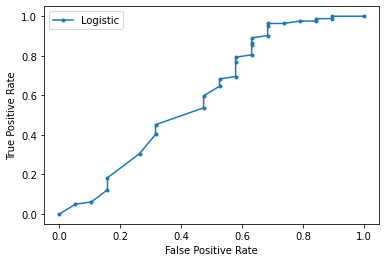

In [1390]:
fpr, tpr, thresholds = metrics.roc_curve(GT, pred_prob)
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [1391]:
def specificity_loss_func(ground_truth, predictions):
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(ground_truth):        
        if m==predictions[l] and m==1:
            tp+=1
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==1:
            fn+=1
        if m!=predictions[l] and m==0:
            fp+=1
    return tn/(tn+fp)

# specificity = specificity_loss_func(true.astype(int), pred)
specificity = specificity_loss_func(GT, prediction)
specificity

0.3157894736842105

In [1032]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

path = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/feature_extraction/selection_features.csv"
df = pd.read_csv(path, delimiter=';')
df.shape

(104, 1344)

In [1006]:
selectionFeaturesPath = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Code/Radiomics/feature_extraction/selection_features.csv"
manualFeaturesPath = "/media/sambit/HDD/Sambit/Projects/Radiomics_Project1/Data/manual_features/manual_features_new.csv"
X = pd.read_csv(selectionFeaturesPath, index_col="patientId", delimiter=';') # All data in selectionFeatures.csv
y = pd.read_csv(manualFeaturesPath, index_col="id")
y = y.drop(columns=['Unnamed: 0'])
idX = X.index.values # Patients with input data
y = y[y['outcome'] >= 0] # Keep only patients with given outcome
idY = y.index.values # Patients with output data
patIds = np.array([id for id in idX if id in idY])
testIds = []
trainIds = [v for v in patIds if v not in testIds]
y = y.loc[trainIds]
X = X.loc[trainIds]
X_diagnostics = [col for col in X if col.startswith('diagnostics')]
X = X.drop(columns=X_diagnostics) # Data in selectionFeatures.csv, excluding diagnostic features
X.index.names = ['id'] # Renaming 'patientId' to 'id'
y = y.filter(items=['outcome']) # Keep only outcome

X.shape, y.shape

((102, 1306), (102, 1))

In [1014]:
scaler = StandardScaler()
scaler.fit(X.fillna(0))

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X.fillna(0)), y)
selected_feat = X.columns[(sel_.get_support())]
print(len(selected_feat))

498


/home/sambit/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sambit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1024]:
FSmethod = 'LASSO'
params = {'nFeatures': 15}
nFeatures = params['nFeatures']
alpha = 0.002
clf = Lasso(alpha=alpha, normalize=True, max_iter=2000).fit(X, y.values.ravel())
importance = np.abs(clf.coef_)
print(len(np.unique(importance)))
# # Check that the features selected will have non-zero weight
# nrNonZero = np.count_nonzero(importance)
# if nrNonZero < nFeatures:
#     print(f'Warning: Number of features selected with "{method}" is reduced from {nFeatures} to {nrNonZero} to only select features with non-zero weights. ')
#     nFeatures = nrNonZero

# # Select and return the best features (as string names)
# idxFeatures = (-importance).argsort()[:nFeatures]
# return [v for v in X.columns.values[idxFeatures]]

50
